# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ максимум из возможного

ссылки на посылки:

https://contest.yandex.ru/contest/56884/run-report/100733483/

https://contest.yandex.ru/contest/56884/run-report/101851637/

ник в контесте: Антон Нуждин 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [18]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [19]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

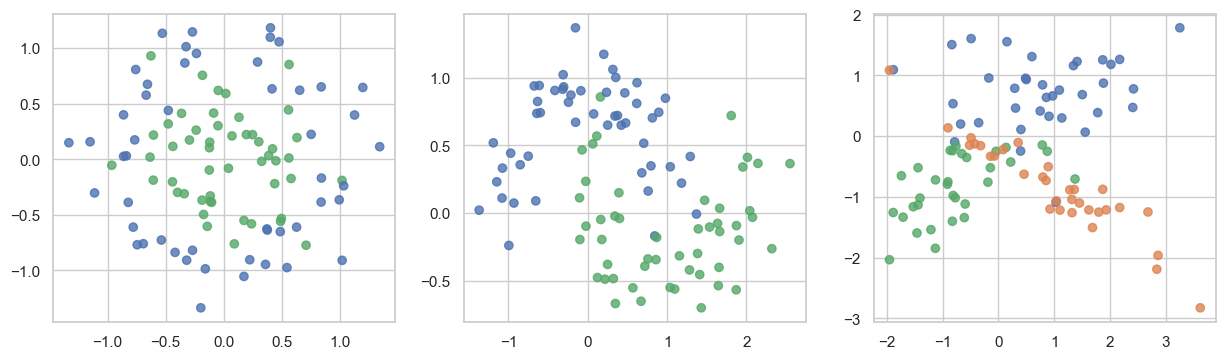

In [20]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [21]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

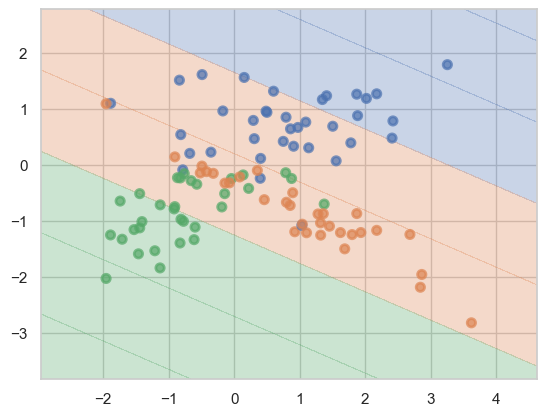

In [22]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

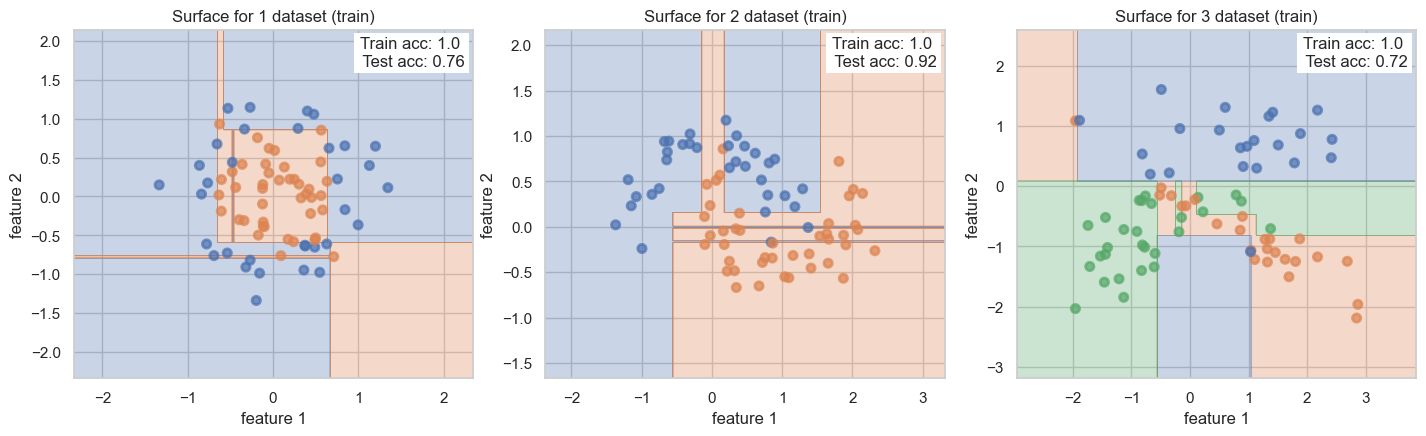

In [23]:
from sklearn.metrics import accuracy_score
ds1, ds2, ds3 = datasets

ds_all = [ds1, ds2, ds3]

plt.figure(figsize=(15, 5))

i = 1
for ds in ds_all:
    x1_train, x1_test, y1_train, y1_test = train_test_split(ds[0], ds[1], test_size=0.25, random_state=42)
    clf = DecisionTreeClassifier().fit(x1_train, y1_train)
    pred_test = clf.predict(x1_test)
    pred_train = clf.predict(x1_train)

    train_accuracy = accuracy_score(y1_train, pred_train)
    test_accuracy = accuracy_score(y1_test, pred_test)

    plt.subplot(1, 3, i)
    plot_surface(clf, x1_train, y1_train)
    plt.title(f'Surface for {i} dataset (train)')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.text(x=0.98, y=0.98, s=f'Train acc: {train_accuracy} \n Test acc: {test_accuracy}', fontsize=12, ha='right', va='top',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
    i += 1


__Ответ:__ исходя из полученных Accuracy можно однозначно сделать вывод, что деревья сильно переобучились. Accuracy на трейне всегда = 1, в то время как на тесте становится сильно меньше. Тот же вывод можно сделать и смотря на полученные графики: деревья слишком точно предсказывают класс для трейна и, очевидно, обобщающая способность у них будет плохая. 

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Построим интерактивный график, где можно выбрать глубину, min_samples_leaf и номер датасета

In [24]:
from ipywidgets import interact, IntSlider

ds_all = [ds1, ds2, ds3]

def plot_tree(max_depth=1, min_leaf=1, ds_index=0):
    x1_train, x1_test, y1_train, y1_test = train_test_split(ds_all[ds_index - 1][0], ds_all[ds_index - 1][1], test_size=0.25, random_state=42)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_leaf)
    clf.fit(x1_train, y1_train)

    pred_test = clf.predict(x1_test)
    pred_train = clf.predict(x1_train)

    train_accuracy = accuracy_score(y1_train, pred_train)
    test_accuracy = accuracy_score(y1_test, pred_test)

    plot_surface(clf, x1_train, y1_train)
    plt.title(f'Surface (train)')

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.text(x=0.98, y=0.98,
                s=f'Train acc: {np.round(train_accuracy, 4)} \n Test acc: {np.round(test_accuracy, 4)} \n depth={max_depth} \n min_samp_leaf={min_leaf}',
                fontsize=12,
                ha='right',
                va='top',
                transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
    plt.show()


depth_slider = IntSlider(min=1, max=10, value=1, description='Max Depth')
min_samples_slider = IntSlider(min=1, max=10, value=1, description='Min Samples Leaf')
dataset_number_slider = IntSlider(min=1, max=3, value=1, description='Dataset Number')

interact(plot_tree, max_depth=depth_slider, min_leaf=min_samples_slider, ds_index=dataset_number_slider)
plt.show()

interactive(children=(IntSlider(value=1, description='Max Depth', max=10, min=1), IntSlider(value=1, descripti…

__Ответ:__ Можно заметить, что при увеличении глубины дерево сильнее переобучается. При этом параметром min_samples_leaf можно регулировать обощающую способность. Если взять максимальную глубину и увеличивать min_samples_leaf, обобщающая способность будет увеличиваться, что логично, ведь дерево перестает подстраиваться под конкретные объекты. 

В целом, такая закономерность наблюдается на всех датасетах (где-то более явно, где-то менее, зависит, наверное, от простоты зависимостей в датасетах)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [25]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


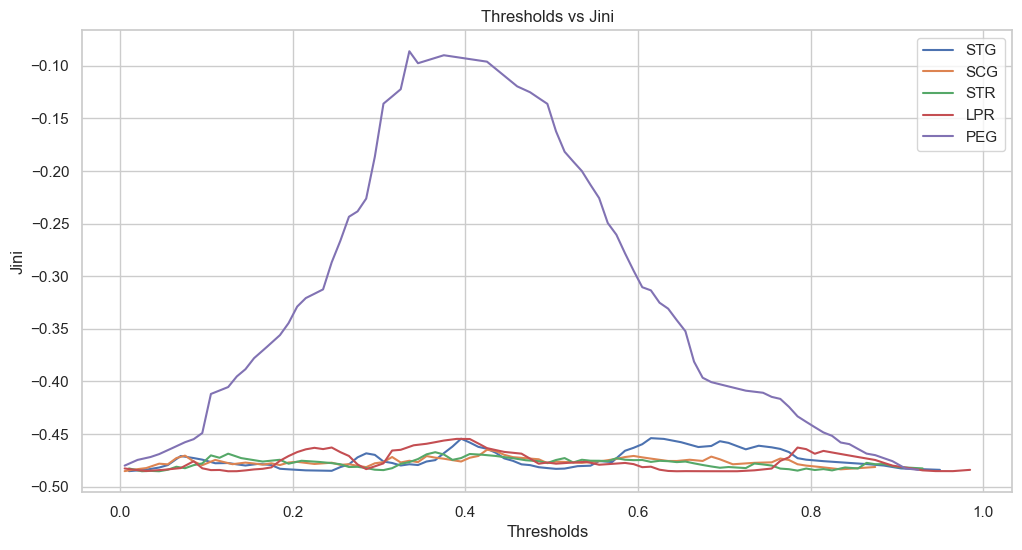

In [27]:
import hw5code as tr

ths1, jinis1, _, _ = tr.find_best_split(df['STG'].to_list(), df['UNS'].to_list())
ths2, jinis2, _, _ = tr.find_best_split(df['SCG'].to_list(), df['UNS'].to_list())
ths3, jinis3, _, _ = tr.find_best_split(df['STR'].to_list(), df['UNS'].to_list())
ths4, jinis4, _, _ = tr.find_best_split(df['LPR'].to_list(), df['UNS'].to_list())
ths5, jinis5, _, _ = tr.find_best_split(df['PEG'].to_list(), df['UNS'].to_list())

fig = plt.figure(figsize=(12, 6))
plt.plot(ths1, jinis1, label='STG')
plt.plot(ths2, jinis2, label='SCG')
plt.plot(ths3, jinis3, label='STR')
plt.plot(ths4, jinis4, label='LPR')
plt.plot(ths5, jinis5, label='PEG')
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Jini')
plt.title('Thresholds vs Jini')
plt.show()


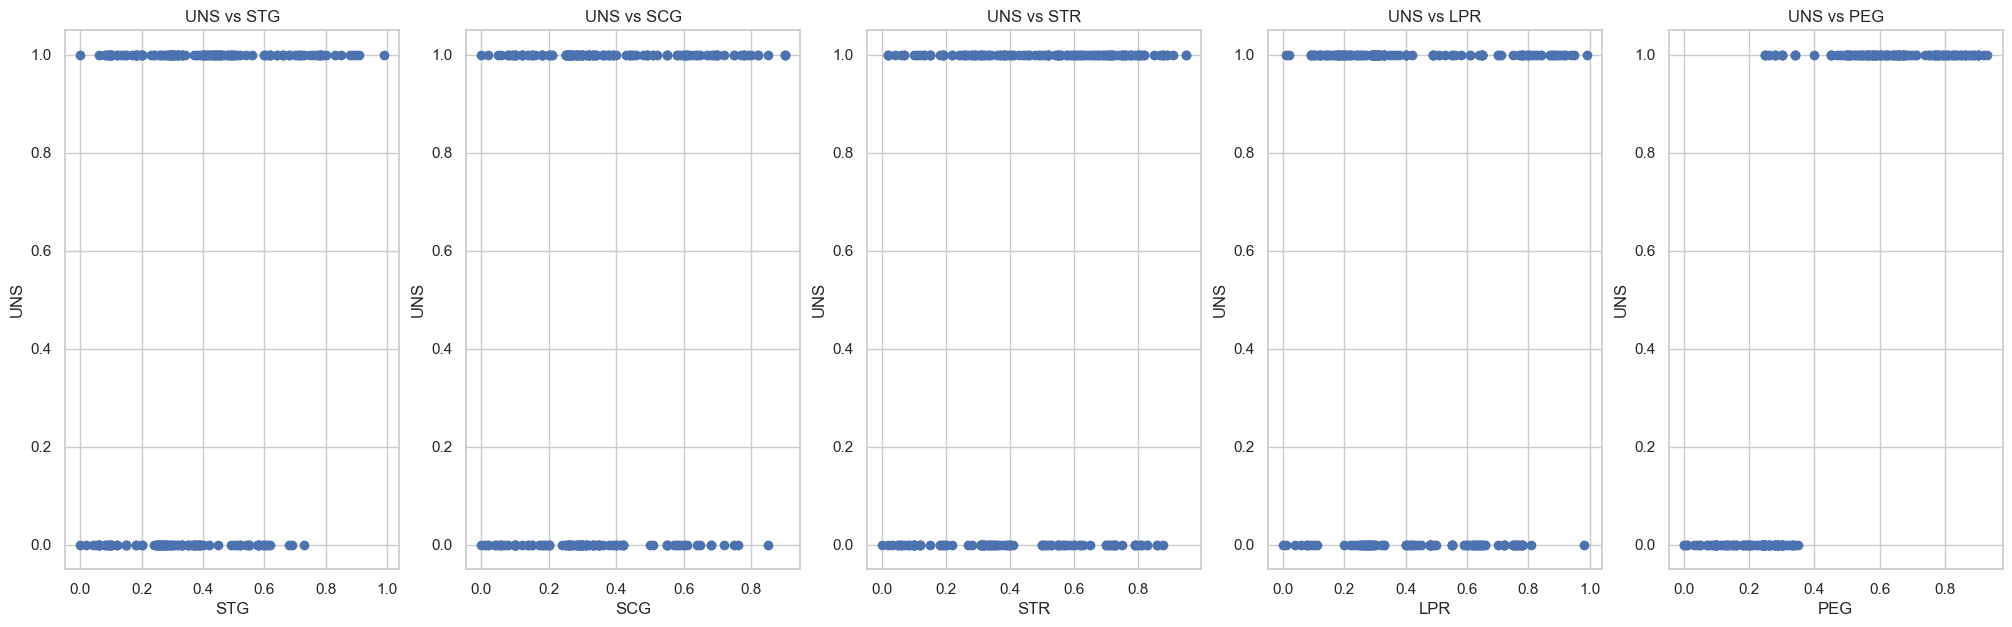

In [28]:
plt.figure(figsize=(25, 7))

features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.scatter(df[features[i - 1]].to_list(), df['UNS'].to_list())
    plt.xlabel(features[i - 1])
    plt.ylabel('UNS')
    plt.title(f'UNS vs {features[i - 1]}')



__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Судя по графикам ths и Jini, нужно производить деление по признаку "PEG". На его графике видно, что при некотором пороге Jini очень сильно возрастает, в то время как остальные признаки при разных порогах имеют +- одинковые (или вообще случайные) значения Jini

Это наблюдение также согласуется со scatter-графиками, так как только на признаке PEG видно четкое разделение на два класса, начиная с определенного значения (около 0.4)

Можно сказать, что признак хорош для деления, если кривая зависимости Jini от ths имеет явный максимум. То есть сначала кривая возрастает, достигает пика при определенном ths, а потом начинает убывать. 

Также признак плох для деления, если эта зависимость ведет себя непредсказуемо и не имеет явного максимума.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [29]:
from hw5code import DecisionTree
from sklearn.preprocessing import LabelEncoder

df_mush = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
df_mush.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [30]:
le = LabelEncoder()
for col in df_mush.columns:
    df_mush[col] = le.fit_transform(df_mush[col])
df_mush.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [31]:
X = df_mush.iloc[:, 1:].to_numpy()
y = df_mush.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt = DecisionTree(['categorical'] * X_train.shape[1])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

df_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')

for col in df_toe.columns:
    df_toe[col] = le.fit_transform(df_toe[col])

X_toe = df_toe.iloc[:,:-1].to_numpy()
y_toe = df_toe.iloc[:,-1].to_numpy()


In [33]:
test_accuracy_depth = []
depth = np.arange(1, 25)
for max_depth in depth:
    dt = DecisionTree(['categorical'] * X_train.shape[1], max_depth=max_depth)
    test_accuracy_depth.append(cross_val_score(dt, X_toe, y_toe, cv=5, scoring=make_scorer(accuracy_score)).mean())

In [34]:
test_accuracy_split = []
min_split = np.arange(1, 25)
for split in depth:
    dt = DecisionTree(['categorical'] * X_train.shape[1], min_samples_split=split)
    test_accuracy_split.append(cross_val_score(dt, X_toe, y_toe, cv=5, scoring=make_scorer(accuracy_score)).mean())


In [35]:
test_accuracy_leaf = []
min_leaf = np.arange(1, 25)
for leaf in min_leaf:
    dt = DecisionTree(['categorical'] * X_train.shape[1], min_samples_leaf=leaf)
    test_accuracy_leaf.append(cross_val_score(dt, X_toe, y_toe, cv=5, scoring=make_scorer(accuracy_score)).mean())


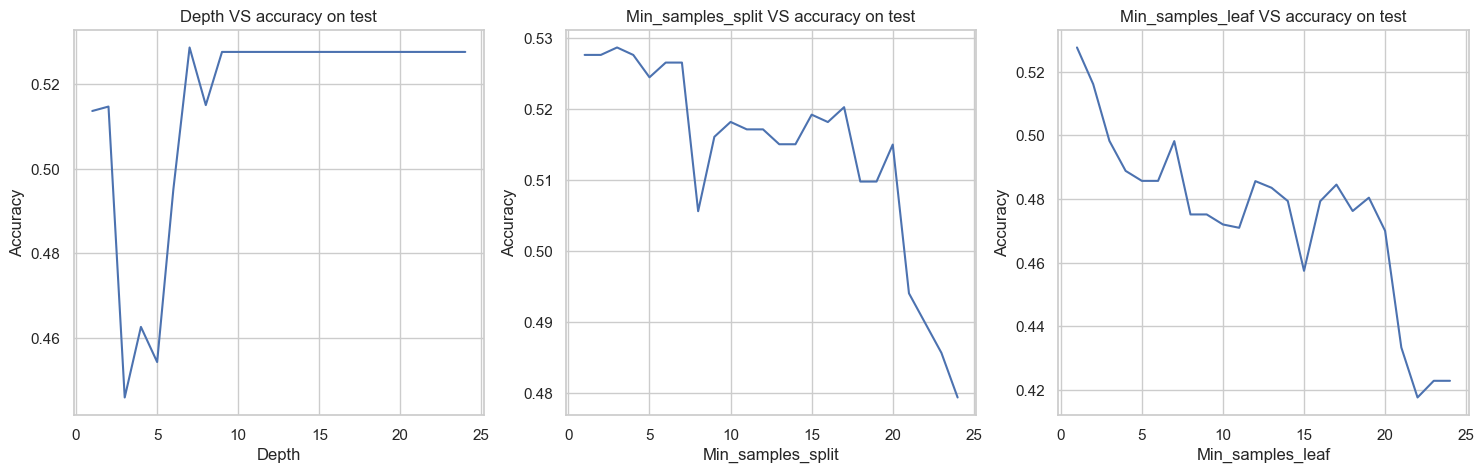

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(depth, test_accuracy_depth)
ax[0].set_title('Depth VS accuracy on test')
ax[0].set_xlabel("Depth")
ax[0].set_ylabel("Accuracy")

ax[1].plot(min_split, test_accuracy_split)
ax[1].set_title('Min_samples_split VS accuracy on test')
ax[1].set_xlabel("Min_samples_split")
ax[1].set_ylabel("Accuracy")

ax[2].plot(min_leaf, test_accuracy_leaf)
ax[2].set_title('Min_samples_leaf VS accuracy on test')
ax[2].set_xlabel("Min_samples_leaf")
ax[2].set_ylabel("Accuracy")

plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [37]:
df_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
df_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
df_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
df_mush = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

df_mush = df_mush.apply(LabelEncoder().fit_transform)

df_toe = df_toe.apply(LabelEncoder().fit_transform)

df_cars['unacc'] = df_cars['unacc'].replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
df_cars = df_cars.apply(LabelEncoder().fit_transform)

df_nursery['recommend'] = df_nursery['recommend'].replace({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})
df_nursery = df_nursery.apply(LabelEncoder().fit_transform)

In [38]:
from sklearn.preprocessing import OneHotEncoder

def experinment(ans_table: pd.DataFrame, name: str) -> None:
    name_to_df = {
        'mushrooms': [df_mush.iloc[:,1:].to_numpy(), df_mush.iloc[:,0].to_numpy()],
        'tic-tac-toe': [df_toe.iloc[:,:-1].to_numpy(), df_toe.iloc[:,-1].to_numpy()],
        'cars': [df_cars.iloc[:,:-1].to_numpy(), df_cars.iloc[:,-1].to_numpy()],
        'nursery': [df_nursery.iloc[:,:-1].to_numpy(), df_nursery.iloc[:,-1].to_numpy()],
    }

    X, y = name_to_df[name]

    dt_real = DecisionTree(feature_types=['real'] * X.shape[1])
    ans_table.loc[name, 'Reals'] = cross_val_score(dt_real, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    dt_cat = DecisionTree(feature_types=['categorical'] * X.shape[1])
    ans_table.loc[name, 'Categorical'] = cross_val_score(dt_cat, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    X_ohe = OneHotEncoder(sparse=False).fit_transform(X)
    dt_ohe_real = DecisionTree(feature_types=['real'] * X_ohe.shape[1])
    ans_table.loc[name, 'Reals+OHE'] = cross_val_score(dt_ohe_real, X_ohe, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    dt_sklearn = DecisionTreeClassifier(random_state=42)
    ans_table.loc[name, 'Sklearn'] = cross_val_score(dt_sklearn, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

ans_table = pd.DataFrame()
for name in ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']:
    experinment(ans_table, name)

In [40]:
ans_table

,Reals,Categorical,Reals+OHE,Sklearn
mushrooms,0.999261,1.000000,0.999631,0.961984
tic-tac-toe,0.462697,0.549265,0.553520,0.777763
cars,0.942600,0.967519,0.921767,0.944371
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [41]:
df_mush.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [42]:
df_cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


In [43]:
ans_table

,Reals,Categorical,Reals+OHE,Sklearn
mushrooms,0.999261,1.000000,0.999631,0.961984
tic-tac-toe,0.462697,0.549265,0.553520,0.777763
cars,0.942600,0.967519,0.921767,0.944371
nursery,0.999846,0.999923,0.999769,0.999846


**Ответ:**

1) На датасете mushrooms видим, что лучше всего работают категориальные признаки. Ну и в целом accuracy на всех методах очень высокий. Результаты логичные, ведь там действительно все признаки категориальные и, скорее всего, порядок на них слабый.

2) С датасетом tic-tac все довольно печально. Вероятно, наше дерево просто переобучилось и дала очень плохой accuracy. Ну и данные в датасете довольно сложные. В то время как библиотечное дерево справилось хорошо, что говорит о том, что у него лучше обобщающая способность и оно борется с переобучением. Причем результаты на нашем дереве лучше на численных признаках + OHE (что довольно странно). Вероятно это произошло просто из-за специфики данных, ведь там написаны ходы играющих людей. 

3) На Cars ситуация аналогичная mushrooms. Категориальные признаки показали себя лучше всего, что тоже логично.

4) На датасете nursery все алгоритмы показали крутой результат, но лучше всего себя показали категориальные признаки. Вероятно, они там действительно категориальные (удивительно) и на них есть какой-то порядок, но он довольно слабый. 

Ну и кажется, нигде никакой случайности не наблюдается.

Итого кажется, что категориальные тут в общем случае показывают себя лучше на этих датасетах, кроме tic-tac-toe. На втором месте в большинстве датасетов нахятся Reals. Ну и в целом Reals+OHE кажется странным способом, так что я бы относился к нему с осторожностью. 

Вставьте что угодно, описывающее ваши впечатления от этого задания:


In [220]:
from IPython.display import Image
Image(url='https://memasno.ru/uploads/posts/2022-10/memy-s-dubom-chto-za-trend-mudroe-misticheskoe-derevo-6.jpg')